In [1]:
import pandas as pd

In [2]:
pdataset = pd.read_csv('Placement.csv')

In [3]:
pdataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
pdataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Replacing Nan values

In [5]:
from UnivariateF import UnivariateC
quan, qual = UnivariateC.quanQual(pdataset)
pdataset[quan]

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,NaN
4,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0


In [6]:
#replace Nan value to mean since the student is not placed.

import numpy as np
from sklearn.impute import SimpleImputer
#to replace with zero
#imp = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
# since our aim to predict the salary from the candidates academic and entrace results, we should take the mean value
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(pdataset[quan])
rdataset = imp.transform(pdataset[quan])
rdataset

array([[1.00000000e+00, 6.70000000e+01, 9.10000000e+01, ...,
        5.50000000e+01, 5.88000000e+01, 2.70000000e+05],
       [2.00000000e+00, 7.93300000e+01, 7.83300000e+01, ...,
        8.65000000e+01, 6.62800000e+01, 2.00000000e+05],
       [3.00000000e+00, 6.50000000e+01, 6.80000000e+01, ...,
        7.50000000e+01, 5.78000000e+01, 2.50000000e+05],
       ...,
       [2.13000000e+02, 6.70000000e+01, 6.70000000e+01, ...,
        5.90000000e+01, 6.97200000e+01, 2.95000000e+05],
       [2.14000000e+02, 7.40000000e+01, 6.60000000e+01, ...,
        7.00000000e+01, 6.02300000e+01, 2.04000000e+05],
       [2.15000000e+02, 6.20000000e+01, 5.80000000e+01, ...,
        8.90000000e+01, 6.02200000e+01, 2.88655405e+05]])

In [7]:
gdataset = pd.DataFrame(rdataset, columns = quan)
gdataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000


In [8]:
qual1 = pdataset[qual]
two = [gdataset, qual1]
Ndataset = pd.concat(two, axis=1)
Ndataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [9]:
NPCount = (Ndataset['status']=='Not Placed').sum()
NPCount

67

In [10]:
salarycount = (Ndataset['salary']>500000).sum()
salarycount

3

In [11]:
#minsalary = Ndataset['salary'].min()
df = Ndataset

min_salary_row = df.loc[df['salary'].idxmin()]
print("Specialization with minimum salary:", min_salary_row['specialisation'])
print("Minimum salary:", min_salary_row['salary'])


Specialization with minimum salary: Mkt&Fin
Minimum salary: 200000.0


In [12]:
from scipy.stats import ttest_ind
scitech = Ndataset[Ndataset['degree_t']=='Sci&Tech']['salary']
mkthr = Ndataset[Ndataset['degree_t']=='Mkt&HR']['salary']

ttest_ind(scitech,mkthr)

Ttest_indResult(statistic=nan, pvalue=nan)

In [13]:
#Test the Analysis of Variance between etest_p and mba_p at signifance level 5%. (Make decision using Hypothesis Testing)
from scipy.stats import f_oneway

# cleaning data
clean_data = Ndataset[['etest_p', 'mba_p']].dropna()

# Perform one-way ANOVA
f_stat, p_value = f_oneway(clean_data['etest_p'], clean_data['mba_p'])

# Print results
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Conclusion at 5% significance level
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between etest_p and mba_p.")
else:
    print("Fail to reject the null hypothesis: No significant difference between etest_p and mba_p.")


F-statistic: 98.64487057324706
p-value: 4.672547689133573e-21
Reject the null hypothesis: Significant difference between etest_p and mba_p.


In [14]:
#Test the similarity between the degree_t (Sci&Tech) and specialisation (Mkt&HR) 
#with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

from scipy.stats import ttest_ind
# Filter salary data
sci_tech_salary = Ndataset[Ndataset['degree_t'] == 'Sci&Tech']['salary'].dropna()
mkt_hr_salary = Ndataset[Ndataset['specialisation'] == 'Mkt&HR']['salary'].dropna()

# Perform independent t-test
t_stat, p_value = ttest_ind(sci_tech_salary, mkt_hr_salary)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Decision at 5% significance level
if p_value < 0.05:
    print("Reject the null hypothesis: Salaries are significantly different between Sci&Tech and Mkt&HR groups.")

else:
    print("Fail to reject the null hypothesis: No significant difference in salaries between Sci&Tech and Mkt&HR groups.")


T-statistic: 2.774724236760964
P-value: 0.006218437705806388
Reject the null hypothesis: Salaries are significantly different between Sci&Tech and Mkt&HR groups.


In [15]:

from scipy.stats import ttest_rel

# Filter and clean data
etest = Ndataset['etest_p']
mba = Ndataset['mba_p']

# Drop missing values and align indices
paired_data = Ndataset[['etest_p', 'mba_p']].dropna()
etest_clean = paired_data['etest_p']
mba_clean = paired_data['mba_p']

# Perform paired t-test
t_stat, p_value = ttest_rel(etest_clean, mba_clean)

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Conclusion at 5% significance level
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between etest_p and mba_p.")
else:
    print("Fail to reject the null hypothesis: No significant difference between etest_p and mba_p.")


t-statistic: 10.840680769176654
p-value: 4.1449406968815296e-22
Reject the null hypothesis: Significant difference between etest_p and mba_p.


In [16]:
#Convert the normal distribution to standard normal distribution for salary column - Z score normalization
#z-score normalization transforms the data so that it has a mean of 0 and standard deviation of 1.
#This is useful for comparing values across different scales or preparing data for machine learning models

from scipy.stats import zscore

Ndataset = Ndataset.dropna(subset=['salary'])

# Apply z-score normalization
Ndataset['salary_zscore'] = zscore(Ndataset['salary'])

# View the result
print(Ndataset[['salary', 'salary_zscore']].head())



          salary  salary_zscore
0  270000.000000  -2.414078e-01
1  200000.000000  -1.147234e+00
2  250000.000000  -5.002152e-01
3  288655.405405  -7.532285e-16
4  425000.000000   1.764349e+00


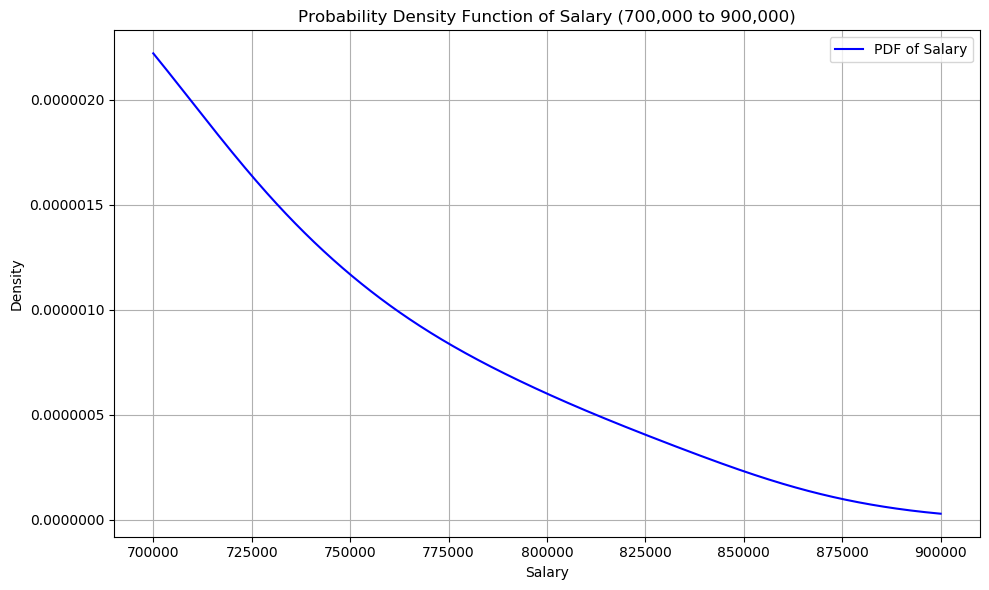

In [17]:
#What is the probability Density Function of the salary range from 700000 to 900000?
#Probability Density Function (PDF)

import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample salary data (replace with your actual dataset)
np.random.seed(0)
salary_data = np.random.normal(loc=600000, scale=100000, size=1000)

# Convert to DataFrame
df = pd.DataFrame({'salary': salary_data})

# Drop missing values
df = df.dropna(subset=['salary'])

# Define salary range
salary_range = np.linspace(700000, 900000, 500)

# Fit Gaussian KDE
kde = gaussian_kde(df['salary'])

# Evaluate PDF
pdf_values = kde(salary_range)

# Plot PDF
plt.figure(figsize=(10, 6))
plt.plot(salary_range, pdf_values, color='blue', label='PDF of Salary')
plt.title('Probability Density Function of Salary (700,000 to 900,000)')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()



In [18]:
#Which parameter is highly correlated with salary?
# Drop rows with missing salary values
Ndataset = Ndataset.dropna(subset=['salary'])

# Select only numeric columns
numeric_cols = Ndataset.select_dtypes(include='number')

# Calculate correlation with salary
correlations = numeric_cols.corr()['salary'].drop('salary')

# Find the most correlated parameter
most_correlated_param = correlations.idxmax()
highest_correlation_value = correlations.max()

print(f"The parameter most highly correlated with salary is '{most_correlated_param}' with a correlation coefficient of {highest_correlation_value:.3f}.")

The parameter most highly correlated with salary is 'salary_zscore' with a correlation coefficient of 1.000.


In [19]:
dataset = Ndataset

# Replacing outliers

In [20]:
descriptive = pd.DataFrame(index = ["mean",'median','mode', 'min','25%','50%','75%','max',
                                    'IQR','1.5IQR','lesserRange','greaterRange'], columns = quan)
for columnName in quan:
    descriptive[columnName]['mean']= dataset[columnName].mean()
    descriptive[columnName]['median']= dataset[columnName].median()
    descriptive[columnName]['mode'] = dataset[columnName].mode()[0]
    descriptive[columnName]['min'] = dataset[columnName].min()
    descriptive[columnName]['25%'] = dataset.describe()[columnName]['25%']
    descriptive[columnName]['50%'] = dataset.describe()[columnName]['50%']
    descriptive[columnName]['75%'] = dataset.describe()[columnName]['75%']
    descriptive[columnName]['max'] = dataset.describe()[columnName]['max']
    descriptive[columnName]['IQR'] = descriptive[columnName]['75%']-descriptive[columnName]['25%']
    descriptive[columnName]['1.5IQR'] = descriptive[columnName]['IQR']*1.5
    descriptive[columnName]['lesserRange'] = descriptive[columnName]['25%']-descriptive[columnName]['1.5IQR']
    descriptive[columnName]['greaterRange'] = descriptive[columnName]['75%']+descriptive[columnName]['1.5IQR']
    
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
mean,108,67.3034,66.3332,66.3702,72.1006,62.2782,288655
median,108,67,65,66,71,62,288655
mode,1,62,63,65,60,56.7,288655
min,1,40.89,37,50,50,51.21,200000
25%,54.5,60.6,60.9,61,60,57.945,250000
50%,108,67,65,66,71,62,288655
75%,161.5,75.7,73,72,83.5,66.255,288655
max,215,89.4,97.7,91,98,77.89,940000
IQR,107,15.1,12.1,11,23.5,8.31,38655.4
1.5IQR,160.5,22.65,18.15,16.5,35.25,12.465,57983.1


In [21]:
lesser = []
greater = []

for columnName in quan:
    if(descriptive[columnName]['min']<descriptive[columnName]['lesserRange']):
        lesser.append(columnName)
    if (descriptive[columnName]['max']> descriptive[columnName]['greaterRange']):
        greater.append(columnName)

In [22]:
lesser

['hsc_p']

In [23]:
greater

['hsc_p', 'degree_p', 'salary']

In [24]:
#Code for replacing outliers below.
for lesscolumn in lesser:
    dataset.loc [dataset[lesscolumn]<descriptive[lesscolumn]['lesserRange'], lesscolumn]=descriptive[lesscolumn]['lesserRange']
for greatercolumn in greater:
    # Syntax: df.loc[row_indexer, column_indexer] = value
    dataset.loc[dataset[greatercolumn] > descriptive[greatercolumn]['greaterRange'], 
                greatercolumn] = descriptive[greatercolumn]['greaterRange']

In [25]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,salary_zscore
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed,-2.414078e-01
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed,-1.147234e+00
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed,-5.002152e-01
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed,-7.532285e-16
4,5.0,85.80,73.60,73.30,96.8,55.50,346638.513514,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,1.764349e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,346638.513514,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,1.440840e+00
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed,-1.767060e-01
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed,8.210139e-02
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed,-1.095472e+00


In [26]:
dataset.cov()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,salary_zscore
sl_no,3870.000000,-52.641355,-59.598879,-41.465047,52.556168,8.102336,6.773031e+04,3.214399
ssc_p,-52.641355,117.228377,58.853253,42.702550,37.659225,24.535952,-1.475831e+04,0.255801
hsc_p,-59.598879,58.853253,112.063731,33.684453,33.838355,21.517688,-1.769932e+04,0.441267
degree_p,-41.465047,42.702550,33.684453,53.604710,22.078774,17.185200,-2.229025e+04,-0.100024
etest_p,52.556168,37.659225,33.838355,22.078774,176.251018,16.886973,8.908067e+04,2.033680
mba_p,8.102336,24.535952,21.517688,17.185200,16.886973,34.028376,3.278149e+04,0.855559
salary,67730.313842,-14758.309418,-17699.315092,-22290.246020,89080.672267,32781.489750,1.419363e+09,28416.672919
salary_zscore,3.214399,0.255801,0.441267,-0.100024,2.033680,0.855559,2.841667e+04,1.004673


In [27]:
dataset.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,salary_zscore
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.028899,0.051550
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,-0.036180,0.023571
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,-0.044379,0.041587
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,-0.080810,-0.013630
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.178103,0.152829
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.149163,0.146324
salary,0.028899,-0.036180,-0.044379,-0.080810,0.178103,0.149163,1.000000,0.752513
salary_zscore,0.051550,0.023571,0.041587,-0.013630,0.152829,0.146324,0.752513,1.000000


In [28]:
correlation = dataset['hsc_p'].corr(dataset['salary'])
print("Correlation between hsc_p and salary:", correlation)

Correlation between hsc_p and salary: -0.04437896596620006


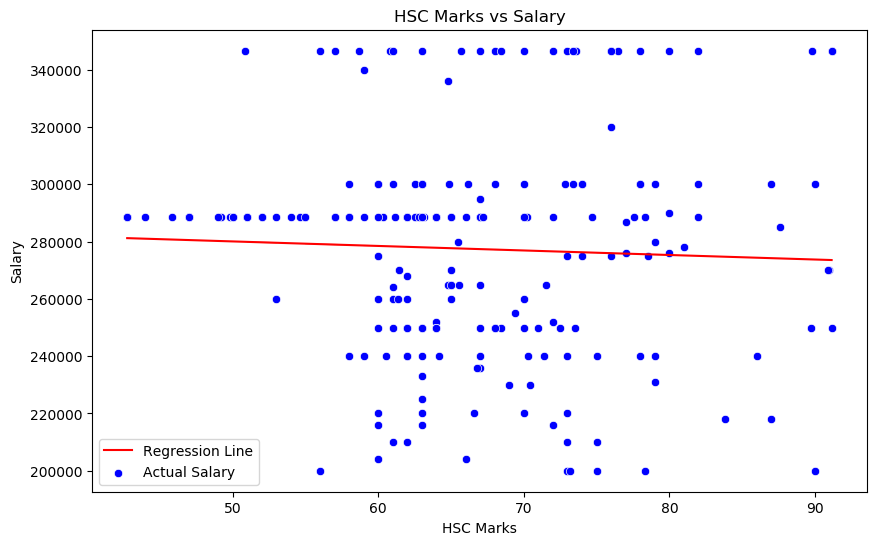

In [29]:
df = dataset



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


X = df[['hsc_p']]
y = df['salary']
model = LinearRegression()
model.fit(X, y)

# Predict salary for regression line
df['Predicted_Salary'] = model.predict(X)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hsc_p', y='salary', data=df, color='blue', label='Actual Salary')
sns.lineplot(x='hsc_p', y='Predicted_Salary', data=df, color='red', label='Regression Line')
plt.title('HSC Marks vs Salary')
plt.xlabel('HSC Marks')
plt.ylabel('Salary')
plt.legend()


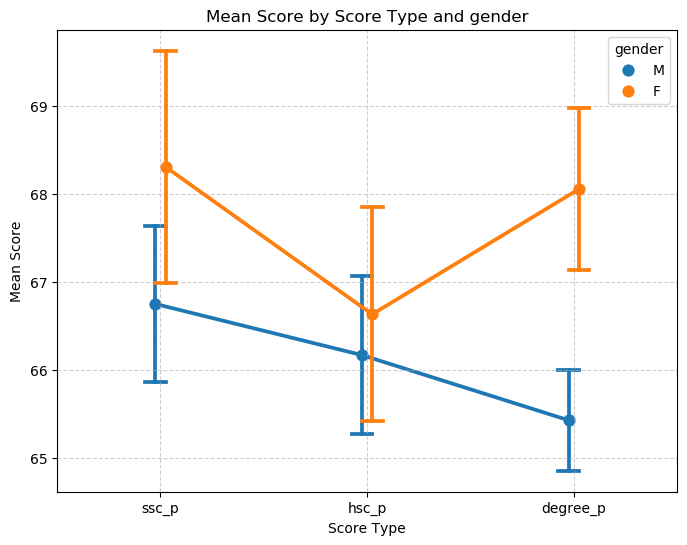

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# The second factor (your C(gender) column)
FACTOR_2 = 'gender'

data_melted = pd.melt(
    dataset,
    id_vars=[FACTOR_2],
    value_vars=['ssc_p', 'hsc_p', 'degree_p'],
    var_name='Score_Type',
    value_name='Score'
)

# Create the plot
plt.figure(figsize=(8, 6))

# Use the 'pointplot' to show means and confidence intervals
sns.pointplot(
    data=data_melted,
    x='Score_Type',        # Factor 1 on the X-axis (SSC, HSC, Degree)
    y='Score',             # Dependent Variable on the Y-axis
    hue=FACTOR_2,          # Factor 2 (Gender) as separate lines/colors
    capsize=0.1,           # Adds caps to the error bars (CI)
    dodge=True,            # Ensures points for the same score type are separated
    errorbar='se'          # Show standard error (or 'ci' for confidence interval)
)

plt.title(f'Mean Score by Score Type and {FACTOR_2}')
plt.xlabel('Score Type')
plt.ylabel('Mean Score')
plt.legend(title=FACTOR_2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
